In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
import os
gpus = tf.config.experimental.list_physical_devices('GPU')

for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
import numpy as np

In [4]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [5]:
import tensorflow as tf

# Loading Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

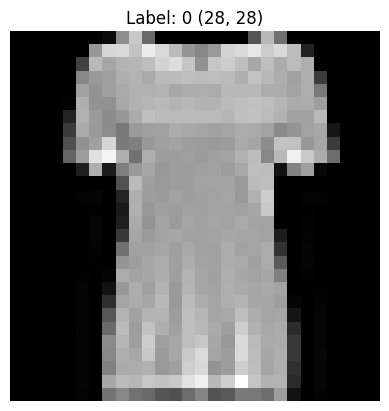

In [8]:
import matplotlib.pyplot as plt

# Select a sample image
image_index = 10
# You can choose any index between 0 and 59999
plt.imshow(x_train[image_index],  cmap='gray')

plt.title(f'Label: {y_train[image_index]} {x_train[image_index].shape}')
plt.axis('off')
plt.show()

In [9]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [10]:
layers = tf.keras.layers

In [11]:
x_train.shape

(60000, 28, 28, 1)

In [12]:
model = tf.keras.Sequential([
   
 tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),  # 14x14

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),  # 7x7

    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),  # 3x3 (small enough)

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    
])

In [13]:
model.compile(optimizer = 'adam',
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [14]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7538 - loss: 0.6722
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8906 - loss: 0.2960
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9119 - loss: 0.2449
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9236 - loss: 0.2092
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9296 - loss: 0.1883
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9389 - loss: 0.1638
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9458 - loss: 0.1442
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9545 - loss: 0.1235
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9585 - loss: 0.1114
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9640 - loss: 0.0949


In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9168 - loss: 0.2585
Test accuracy: 0.9185


In [16]:
model.save("fashion_mnist_model.h5")

In [17]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io
from ipywidgets import FileUpload
from IPython.display import display

upload = FileUpload(accept='image/*', multiple=False)
display(upload)


FileUpload(value=(), accept='image/*', description='Upload')

In [18]:
# # Extract uploaded image
# img_content = list(upload.value)[0]['content']



In [19]:
# # Load image, convert to grayscale, resize to 28x28
# img = Image.open(io.BytesIO(img_content)).convert('L').resize((28,28))

# # Convert image to array and normalize
# img_array = np.array(img)
# # Add batch and channel dimensions
# img_array = img_array.reshape(1, 28, 28, 1)

# # Visualize image
# plt.imshow(img_array[0,:,:,0], cmap='gray')
# plt.axis('off')
# plt.show()

# # Load trained model
# model = tf.keras.models.load_model('fashion_mnist_model.h5')

# # Make prediction
# predictions = model.predict(img_array)
# predicted_label = np.argmax(predictions)

# # Class labels
# class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
#                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# print(f"Predicted label: {class_names[predicted_label]} {predictions}")
